# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [5]:
import tensorflow as tf      #pip install tensorflow
import numpy as np    #pip install numpy
import matplotlib.pyplot as plt  #pip install matplotlib
import cv2       #pip install opencv-python
import os

In [6]:
img_array = cv2.imread("eye dataset/train/Closed_Eyes/s0001_00368_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

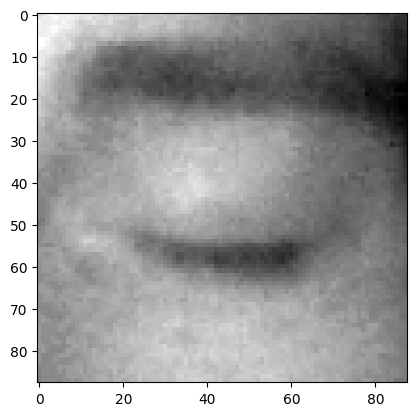

In [7]:
plt.imshow(img_array, cmap='gray')

In [8]:
img_array.shape

(88, 88)

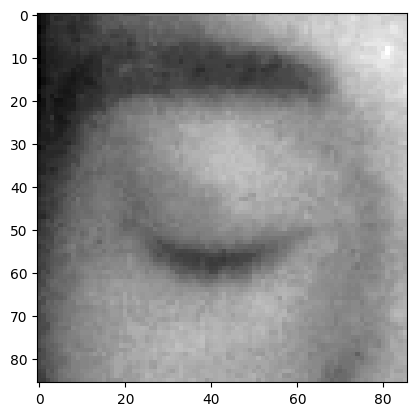

In [9]:
Datadirectory = "eye dataset/train/"
Classes = ["Closed_Eyes","Open_Eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

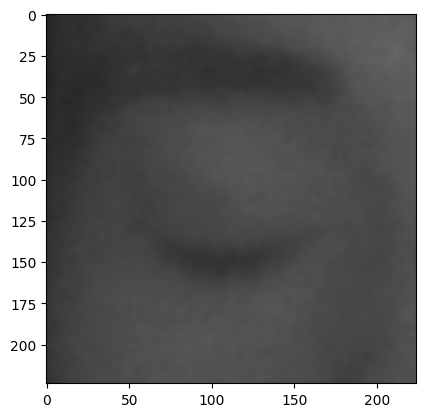

In [10]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [11]:
new_array.shape

(224, 224, 3)

##reading all the images and converting them into an array for data and labels

In [12]:
training_data = []

def create_training_data():
    Classes = ["Closed_Eyes","Open_Eyes"]
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)  ##0 or 1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [13]:
create_training_data()

In [14]:
print(len(training_data))

1000


In [15]:
import random

random.shuffle(training_data)

In [16]:
x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)
    
x=np.array(x).reshape(-1, img_size, img_size, 3)

In [17]:
x.shape

(1000, 224, 224, 3)

In [18]:
## normalize the data
x = x/255.0;

In [19]:
y = np.array(y)

In [20]:
# import pickle
# 
# pickle_out = open("x.pickle", "wb")
# pickle.dump(x, pickle_out)
# pickle_out.close()
# 
# pickle_out = open("y.pickle", "wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

In [21]:
# pickle_in = open("x.pickle", "rb")
# x = pickle.load(pickle_in)
# 
# pickle_in = open("y.pickle", "rb")
# y = pickle.load(pickle_in)

## deep learning model for training - Training Learning

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

In [24]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

## Transfer Learning

In [25]:
base_input = model.input #input

In [26]:
base_output = model.output

In [27]:
# Flat_layers = layers.Flatten()(base_output)
# final_output = layers.Dense(1)(Flat_layers) #one node(1/0)
# final_output = layers.Activation('sigmoid')(final_output)

flat_layer = tf.keras.layers.Flatten()(base_output)
dense_layer = tf.keras.layers.Dense(1)(flat_layer)
output_layer = tf.keras.layers.Activation('sigmoid')(dense_layer)

In [28]:
# new_model1 = keras.Model(inputs=model.inputs, outputs=final_output)

model = tf.keras.models.Model(inputs=base_input, outputs=output_layer)

In [29]:
# new_model1.summary()

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,279,041 (12.51 MB)

 Trainable params: 3,257,153 (12.43 MB)

 Non-trainable params: 21,888 (85.50 KB)

## settings for binary classification (open/closed)

In [30]:
# new_model1.compile(loss= "binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
# new_model1.fit(x, y, epochs=1, validation_split=0.1) ##training

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.8961 - loss: 0.3270 - val_accuracy: 0.5750 - val_loss: 13.4612
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.9940 - loss: 0.0849 - val_accuracy: 0.8625 - val_loss: 3.0710
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.9935 - loss: 0.1382 - val_accuracy: 0.9750 - val_loss: 0.6179
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.9952 - loss: 0.0871 - val_accuracy: 1.0000 - val_loss: 1.0427e-11
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.9992 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 2.1100e-26
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.9966 - loss: 0.0829 - val_accuracy: 0.9875 - val_loss: 0.1402
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.9969 - loss: 0.0273 - val_accuracy: 1.0000 - val_loss: 9.1452e-07
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 1.0000 - loss: 2.4710e-09 - val_accuracy: 1

In [32]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 631ms/step - accuracy: 1.0000 - loss: 4.8851e-17
Test Loss: 0.0000, Test Accuracy: 1.0000


In [ ]:
# #save the model
# model.save('my_model1.h5')

In [33]:
#save the model
model.save('my_model1.keras')

In [34]:
new_model1 = tf.keras.models.load_model('my_model1.keras')
new_model1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 9,793,349 (37.36 MB)

 Trainable params: 3,257,153 (12.43 MB)

 Non-trainable params: 21,888 (85.50 KB)

 Optimizer params: 6,514,308 (24.85 MB)

In [35]:
# Making predictions with the loaded model
predictions = new_model1.predict(x_test)

# Print predictions for the first few samples
for i in range(5):
    print(f'Prediction: {predictions[i]}, Actual: {y_test[i]}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 566ms/step
Prediction: [2.3588246e-35], Actual: 0
Prediction: [1.070237e-35], Actual: 0
Prediction: [0.], Actual: 0
Prediction: [1.], Actual: 1
Prediction: [7.822086e-27], Actual: 0


In [61]:
#set a local image in directory and check how the model predicting it
img_array = cv2.imread('s0006_00129_0_1_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [62]:
x_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [63]:
x_input.shape

(1, 224, 224, 3)

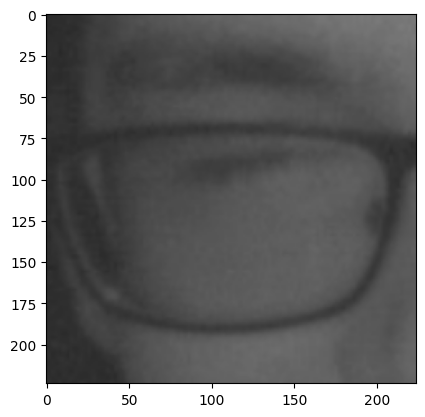

In [64]:
plt.imshow(new_array)

In [65]:
x_input = x_input/255.0;

In [66]:
predictions = new_model1.predict(x_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [67]:
predictions

array([[0.]], dtype=float32)

check on unknown images

In [78]:
img = cv2.imread('0.jpg')

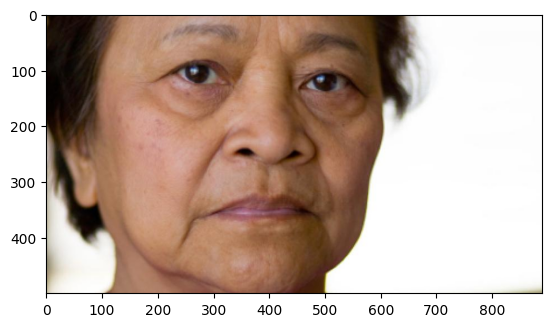

In [79]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# to detect faces use haarcascade files

In [80]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [81]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [82]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [83]:
eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)

In [84]:
for (x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

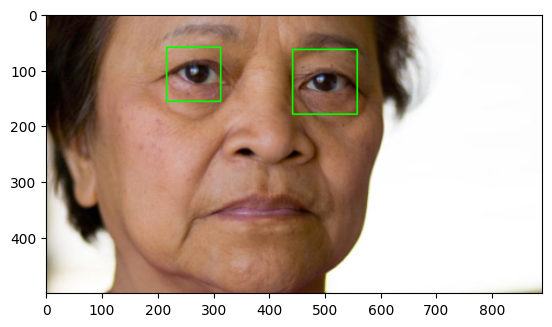

In [85]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))[]

#cropping the eye image

In [86]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print(facecascade.empty())
eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey: ey + eh, ex:ex + ew]

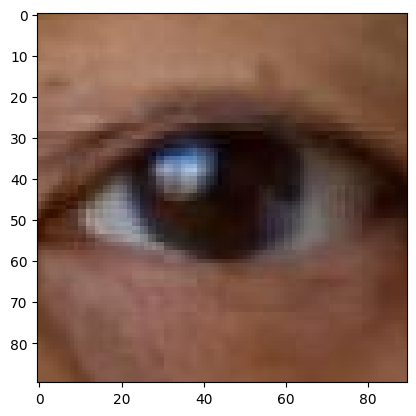

In [88]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [89]:
eyes_roi.shape

(90, 90, 3)

In [91]:
final_image = cv2.resize(eyes_roi, (img_size, img_size))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [92]:
final_image.shape

(1, 224, 224, 3)

In [93]:
new_model1.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


array([[1.]], dtype=float32)

 Real-time Drowsiness Detection using Webcam

In [ ]:
# import cv2
# import numpy as np
# import tensorflow as tf
# 
# # Load the trained model
# new_model1 = tf.keras.models.load_model('my_model1.keras')
# 
# # Define constants
# img_size = 224
# 
# # Load Haar cascades for face and eye detection
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
# 
# # Setting up a connection with the webcam
# cap = cv2.VideoCapture(0)
# 
# # Check if webcam is opened correctly
# if not cap.isOpened():
#     raise IOError("Couldn't open webcam or video")
# 
# while True:
#     ret, frame = cap.read()
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     
#     # Detect faces
#     faces = faceCascade.detectMultiScale(gray, 1.3, 5)
#     
#     for (x, y, w, h) in faces:
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
#         
#         # Region of interest for eyes detection within the face
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]
#         
#         eyes = eyeCascade.detectMultiScale(roi_gray, 1.3, 5)
#         
#         for (ex, ey, ew, eh) in eyes:
#             cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)
#             eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
#             
#             # Preprocess the eye region for prediction
#             final_image = cv2.resize(eyes_roi, (img_size, img_size))
#             final_image = np.expand_dims(final_image, axis=0) # Need a fourth dimension
#             final_image = final_image / 255.0
#             
#             # Make prediction
#             predictions = new_model1.predict(final_image)
#             if predictions[1] > 0:
#                 status = "Open Eyes"
#             else:
#                 status = "Closed Eyes"
#                 
#             # Use putText() method to insert text on the video
#             font = cv2.FONT_HERSHEY_SIMPLEX
#             cv2.putText(frame, status, (50, 50), font, 1, (0, 255, 0), 2, cv2.LINE_4)
#             
#     cv2.imshow('Drowsiness Detection System', frame)
#     
#     if cv2.waitKey(2) & 0xFF == ord('q'):
#         break
# 
# cap.release()
# cv2.destroyAllWindows()
